In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import re

In [7]:
available_ip = pd.read_csv('available_input.csv')
available_ip = available_ip.drop(available_ip.columns[0], axis=1)
available_op = pd.read_csv('available_output.csv')
available_op = available_op.drop(available_op.columns[0], axis = 1)
available_op

,VALUE
0,12500.0
1,14300.0
2,16300.0
3,10200.0
4,12200.0
...,...
1831,16600.0
1832,17500.0
1833,21700.0
1834,20800.0


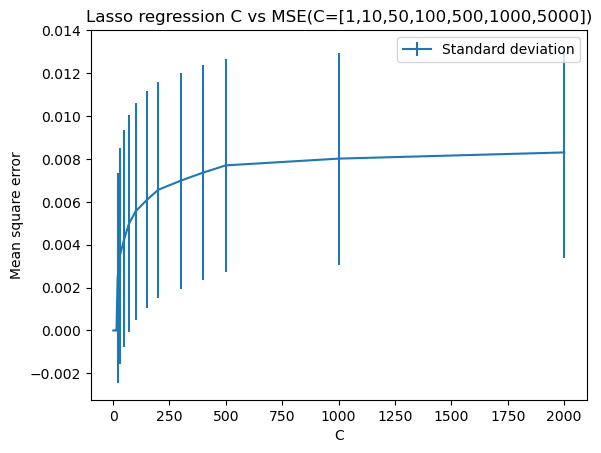

In [17]:
c_range = [ 1, 5, 10, 15, 20, 30, 50, 70, 100, 150, 200, 300, 400, 500, 1000, 2000]
X_Train,X_Test,y_Train,y_Test = train_test_split(available_ip,available_op,test_size = 0.2)
mean_error = []; mse_temp = [];  std_error = []
for C in c_range:
    lasso_model = linear_model.Lasso(alpha = 1/(2*C))
    lasso_model.fit(X_Train, y_Train)
    ypred = lasso_model.predict(X_Test)
    mse = mean_squared_error(y_Test, ypred)
    mse_temp.append(mse)
    mean_error.append(np.array(mse_temp).mean())
    std_error.append(np.array(mse_temp).std())
plt.errorbar(c_range, mean_error, yerr=std_error)
plt.xlabel('C')
plt.ylabel('Mean square error')
plt.title('Lasso regression C vs MSE(C=[1,10,50,100,500,1000,5000])')
plt.legend(['Standard deviation'])
plt.show()